In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
Company_df = pd.read_csv('F:\\PYTHON\\DATA SCIENCE\\Decision Tree\\Assignment\\Company_Data.csv')

In [3]:
Company_df.shape

(400, 11)

In [4]:
Company_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
Company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
Company_df['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

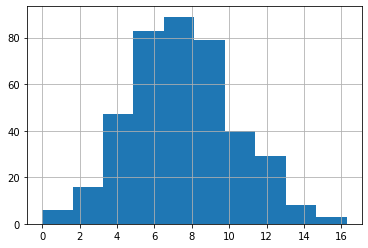

In [7]:
plt.hist(Company_df['Sales'])
plt.grid()
# Company Sales ranges between 0 to 17 thousand dollars.

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label_encoder = LabelEncoder()
Company_df['ShelveLoc'] = label_encoder.fit_transform(Company_df['ShelveLoc'])
Company_df['Urban'] = label_encoder.fit_transform(Company_df['Urban'])
Company_df['US'] = label_encoder.fit_transform(Company_df['US'])
# Trasforming categorical data

In [10]:
Company_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [11]:
Company_df['High_sales'] = Company_df['Sales'].map(lambda x: 1 if x >= 8 else 0)
# Mapping sales > 8 thousand usd as 1 [high sales]

In [12]:
Company_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High_sales
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


In [13]:
X = Company_df.iloc[ : ,1:-1]
Y = Company_df.iloc[ : ,-1]

In [14]:
from sklearn.ensemble import IsolationForest

In [15]:
Iso = IsolationForest(random_state=10 , contamination=0.01)
Iso_fit = Iso.fit(X,Y)
# Getting 1% of outliers from the data

In [16]:
Iso_fit.predict(X)
Company_df['Outlier'] = pd.Series(Iso_fit.predict(X))

In [17]:
Company_df_new = Company_df[Company_df['Outlier'] == 1]
# Removing outliers
Company_df_new.reset_index(drop=True,inplace=True)
Company_df_new

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High_sales,Outlier
0,9.50,138,73,11,276,120,0,42,17,1,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0,1
4,4.15,141,64,3,340,128,0,38,13,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,12.57,138,108,17,203,128,1,33,14,1,1,1,1
392,6.14,139,23,3,37,120,2,55,11,0,1,0,1
393,7.41,162,26,12,368,159,2,40,18,1,1,0,1
394,5.94,100,79,7,284,95,0,50,12,1,1,0,1


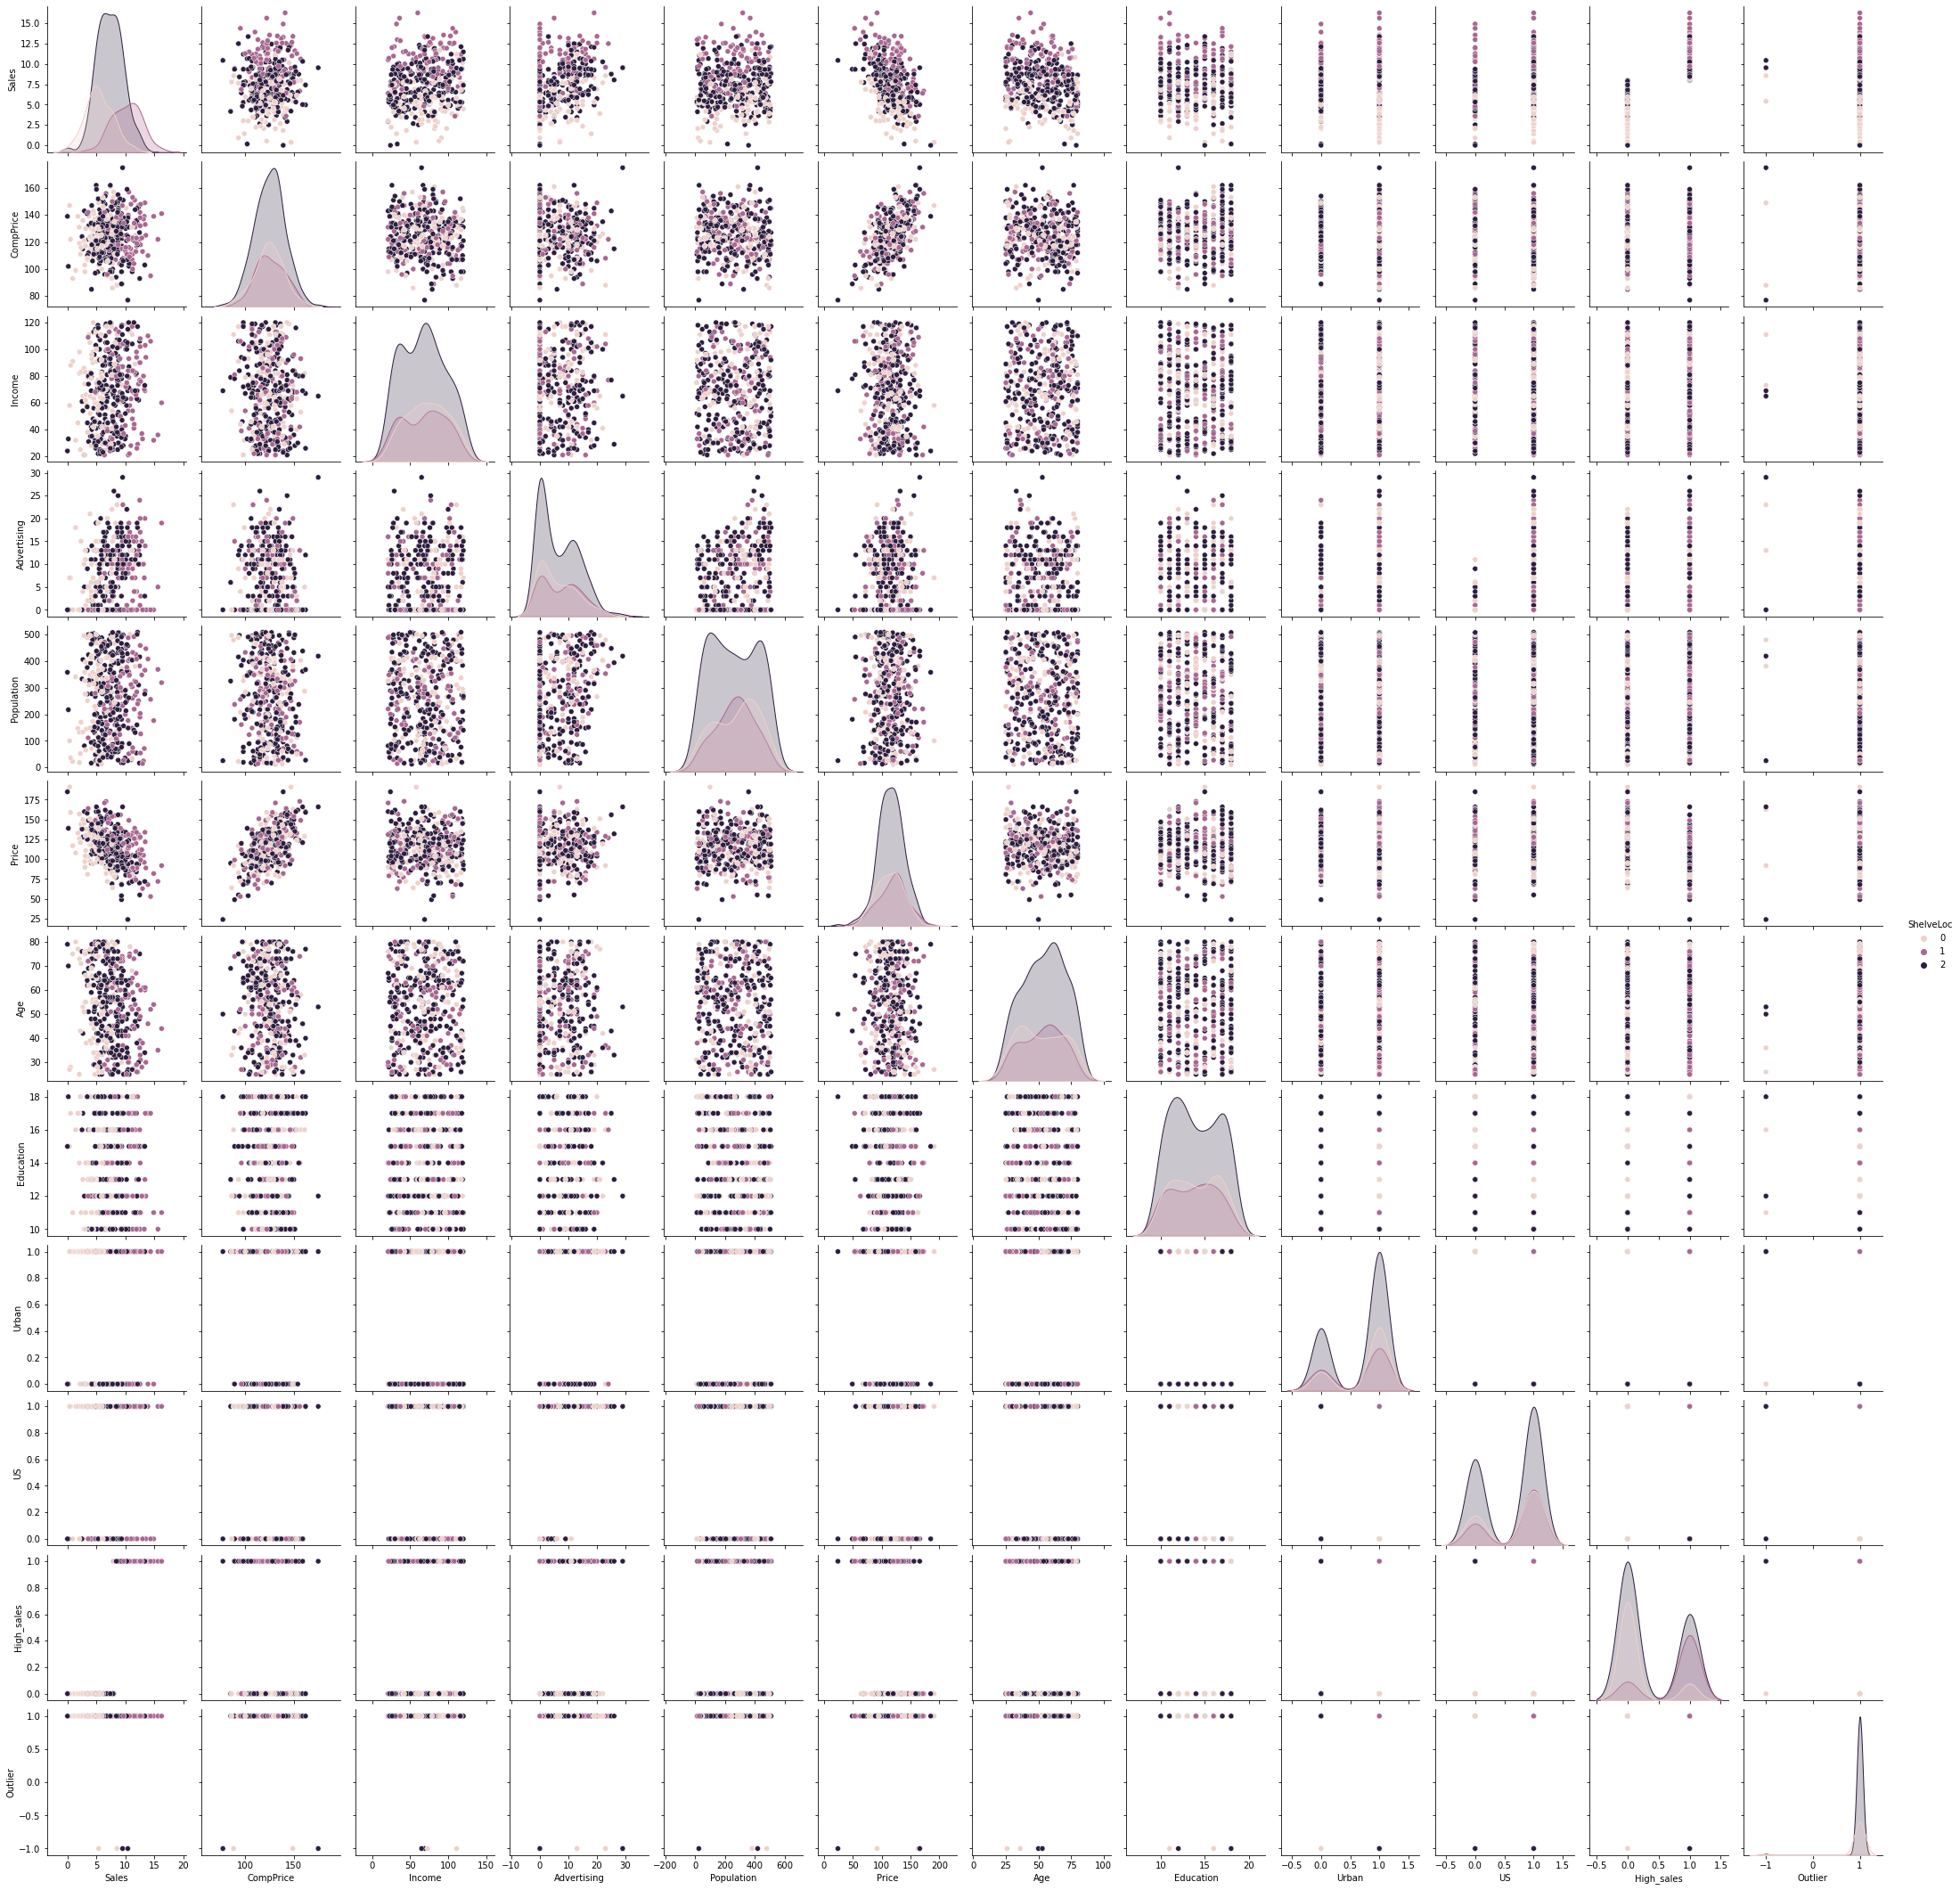

In [18]:
sns.pairplot(Company_df ,hue='ShelveLoc')

In [19]:
X = Company_df_new.iloc[ : ,1:-2]
Y = Company_df_new.iloc[ : ,-2]
# Dividing data into input and output variables 

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train ,X_test ,Y_train ,Y_test = train_test_split(X ,Y ,test_size= 0.3 ,random_state= 0 )

# Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
max_features = 4

In [24]:
model = RandomForestClassifier(n_estimators=120 , max_features= max_features ,criterion='entropy')
# Buildinf Random Forest Model

In [25]:
model_fit = model.fit(X_train,Y_train)
pred = model_fit.predict(X_test)

In [26]:
pd.crosstab(Y_test,pred)

col_0,0,1
High_sales,,
0,58,9
1,15,37


In [27]:
np.mean(pred==Y_test)
# Model having accuracy of 77%

0.7983193277310925

In [28]:
model_fit.feature_importances_

array([0.11778098, 0.10027853, 0.09840802, 0.07201748, 0.25173359,
       0.15373925, 0.13779905, 0.04635281, 0.01090019, 0.01099012])

In [29]:
Company = pd.DataFrame()
Company['Feature Importance'] = pd.Series(model_fit.feature_importances_)

In [30]:
Company['Features'] = X.columns

In [31]:
Importance = Company.sort_values('Feature Importance',ascending=False).reset_index(drop=True)
Importance.head(4)
# Top features respomsible for high sales.

,Feature Importance,Features
0,0.251734,Price
1,0.153739,ShelveLoc
2,0.137799,Age
3,0.117781,CompPrice


<AxesSubplot:xlabel='Feature Importance', ylabel='Features'>

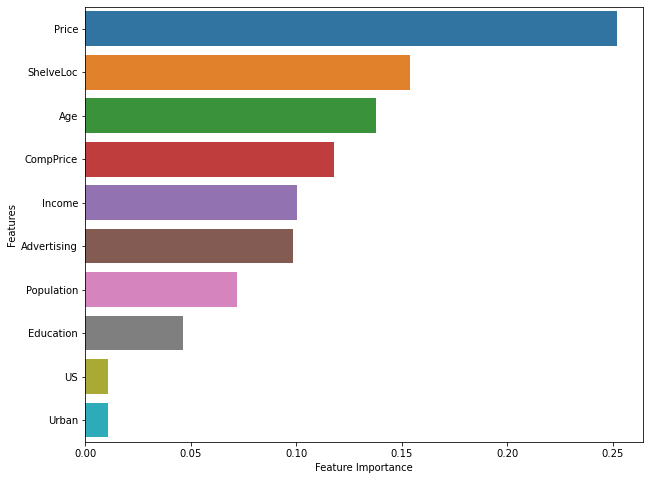

In [32]:
plt.figure(figsize=(10,8))
sns.barplot(x= 'Feature Importance' ,y = 'Features',data  = Importance, orient='h')
#Representation of important features 

In [33]:
model_2 = RandomForestClassifier(n_estimators=120 , max_features= max_features )
# Building model using CART

In [34]:
model_fit_2 = model_2.fit(X_train,Y_train)
pred_2 = model_fit_2.predict(X_test)

In [35]:
pd.crosstab(Y_test,pred_2)

col_0,0,1
High_sales,,
0,61,6
1,17,35


In [36]:
np.mean(pred_2==Y_test)
# Model having accuracy of 81%

0.8067226890756303

In [37]:
model_fit_2.feature_importances_

array([0.1060086 , 0.10887582, 0.10959373, 0.06814072, 0.25174645,
       0.14999193, 0.13851108, 0.04785049, 0.00848541, 0.01079579])

In [38]:
Company['CART Scores'] = pd.Series(model_fit_2.feature_importances_)

In [39]:
Company

,Feature Importance,Features,CART Scores
0,0.117781,CompPrice,0.106009
1,0.100279,Income,0.108876
2,0.098408,Advertising,0.109594
3,0.072017,Population,0.068141
4,0.251734,Price,0.251746
5,0.153739,ShelveLoc,0.149992
6,0.137799,Age,0.138511
7,0.046353,Education,0.047850
8,0.010900,Urban,0.008485
9,0.010990,US,0.010796


<AxesSubplot:>

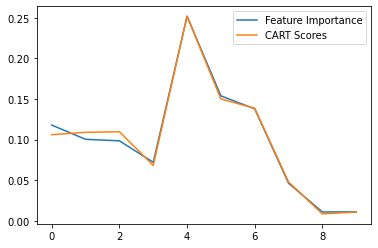

In [40]:
Company.plot()

<AxesSubplot:xlabel='CART Scores', ylabel='Features'>

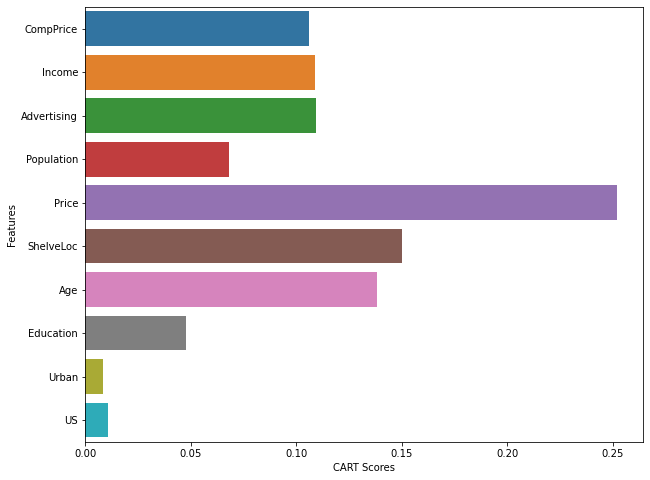

In [41]:
plt.figure(figsize=(10,8))
sns.barplot(x= 'CART Scores' ,y = 'Features',data  = Company, orient='h')
#Representation of CART Scores

In [42]:
Company.sort_values('CART Scores',ascending=False).head(5)
# TOP features responsible for high sales

,Feature Importance,Features,CART Scores
4,0.251734,Price,0.251746
5,0.153739,ShelveLoc,0.149992
6,0.137799,Age,0.138511
2,0.098408,Advertising,0.109594
1,0.100279,Income,0.108876


In [43]:
# Building model by splitting data using kfold and CART